In [ ]:
#hide
from nbdev.showdoc import *
from bionlp_imports import *
from bionlp.core import *
from bionlp.models import *

# BioNLP

> Useful fxns for DL with bio seqs

## Install

In [ ]:
#hide
#`pip install your_project_name`

## How to use

Example starting with synthetic dataset generation.

In [ ]:
dna_dict = gen_dna_vocab(kmer=1)
dna_dict

{'A': 1, 'T': 2, 'C': 3, 'G': 4, 'N': 5}

In [ ]:
synthetic_data = generate_Seqs_Exp_Dataset(50,10,30)
#First 5 Sequences
print('Raw Sequences')
print(synthetic_data['Seqs'][:5])
#First 5 Expression Values
print('\n\nExpression Values')
print(synthetic_data['Exp'][:5])

Raw Sequences
0                    TACTGTCGACAC
1            GTCTTGGCACTAAGTTTGGA
2    CCGAAGGGAGTTTATAAAAAGTGCGGAG
3         GAGTTGTAGGCATCAGCTTGCAT
4           TCTTTGTGCCCTAGGGAACAC
Name: Seqs, dtype: object


Expression Values
0      -1.0949880814497355
1    -0.029172588831908198
2       1.8329884869450184
3     0.024100108008603224
4        0.887977884197582
Name: Exp, dtype: object


In [ ]:
#create a Dataset which can be used with Pytorch Datasets/Dataloaders
synthetic_data.Exp = synthetic_data.Exp.astype(float)
dataset = DnaDataset(synthetic_data)
train_loader = DataLoader(dataset, batch_size=10)

In [ ]:
#view an example batch
sequence_batch, expression_batch = next(iter(train_loader))

In [ ]:
#first sequence/value in the first batch
print(sequence_batch[0])
print(expression_batch[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor(-1.0950)


In [ ]:
expression_batch[0]

tensor(-1.0950)

#### Build and Train a CNN ; with randomly generated data

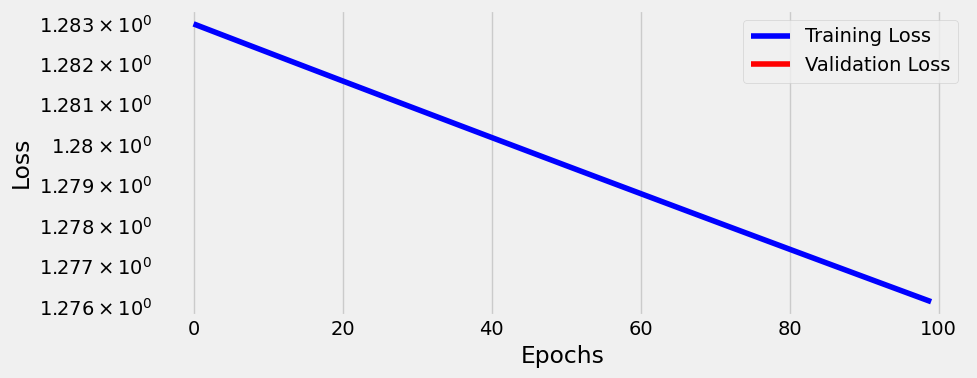

In [ ]:
model = baseline_cnn()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-5)
sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(train_loader)
sbs.train(100)
sbs.plot_losses()